# Aadhaar Lifecycle Intelligence (ALI)
### UIDAI Data Hackathon 2026

This notebook contains the complete reproducible analysis for the UIDAI Data Hackathon 2026, integrating Aadhaar enrolment, demographic update, and biometric update datasets.

**Participant:** Utkarsh Gupta  
**Team ID:** UIDAI_13540


## 1. Data Loading
This section loads the Aadhaar enrolment, demographic update, and biometric update datasets provided for the hackathon.


In [1]:
import os
import pandas as pd

enrol_path = "data/enrolment"
enrol_files = [f for f in os.listdir(enrol_path) if f.endswith(".csv")]

print("Enrolment files:", enrol_files)


Enrolment files: ['api_data_aadhar_enrolment_0_500000.csv', 'api_data_aadhar_enrolment_1000000_1006029.csv', 'api_data_aadhar_enrolment_500000_1000000.csv']


In [ ]:
enrol_df_list = []

for file in enrol_files:
    df = pd.read_csv(
        os.path.join(enrol_path, file),
        low_memory=False
    )
    enrol_df_list.append(df)

enrol_df = pd.concat(enrol_df_list, ignore_index=True)

print("Shape:", enrol_df.shape)
enrol_df.head()


In [ ]:
enrol_df.columns


## 2. Data Preprocessing and Aggregation
Raw datasets are cleaned, validated, and aggregated at the state–year level.


In [4]:
enrol_df = enrol_df[
    ['date', 'state', 'age_0_5', 'age_5_17', 'age_18_greater']
]


In [5]:
enrol_df['date'] = pd.to_datetime(enrol_df['date'], errors='coerce')
enrol_df['year'] = enrol_df['date'].dt.year


In [ ]:
enrol_state = (
    enrol_df
    .groupby(['state', 'year'], as_index=False)
    .sum(numeric_only=True)
)

enrol_state.head()


In [ ]:
enrol_state.dtypes


In [ ]:
enrol_state.shape
enrol_state.head()


In [9]:
enrol_state['year'] = enrol_state['year'].astype(int)


In [10]:
enrol_state = enrol_state[
    enrol_state['state'].apply(lambda x: isinstance(x, str))
]


In [11]:
enrol_state['state'] = enrol_state['state'].str.strip()


In [ ]:
enrol_state.head()
enrol_state.shape


In [13]:
import os

demo_path = "data/demographic"
demo_files = [f for f in os.listdir(demo_path) if f.endswith(".csv")]

print("Demographic files found:", demo_files)


Demographic files found: ['api_data_aadhar_demographic_0_500000.csv', 'api_data_aadhar_demographic_1000000_1500000.csv', 'api_data_aadhar_demographic_1500000_2000000.csv', 'api_data_aadhar_demographic_2000000_2071700.csv', 'api_data_aadhar_demographic_500000_1000000.csv']


In [ ]:
import pandas as pd

demo_df_list = []

for file in demo_files:
    df = pd.read_csv(
        os.path.join(demo_path, file),
        low_memory=False
    )
    demo_df_list.append(df)

demo_df = pd.concat(demo_df_list, ignore_index=True)

print("Shape:", demo_df.shape)
demo_df.head()


In [ ]:
demo_df.columns


In [16]:
demo_df = demo_df[
    ['date', 'state', 'demo_age_5_17', 'demo_age_17_']
]


In [17]:
demo_df['date'] = pd.to_datetime(demo_df['date'], errors='coerce')
demo_df['year'] = demo_df['date'].dt.year


In [18]:
for col in ['demo_age_5_17', 'demo_age_17_']:
    demo_df[col] = pd.to_numeric(demo_df[col], errors='coerce')


In [19]:
demo_state = (
    demo_df
    .groupby(['state', 'year'], as_index=False)
    .sum(numeric_only=True)
)


In [20]:
demo_state = demo_state[
    demo_state['state'].apply(lambda x: isinstance(x, str))
]

demo_state['state'] = demo_state['state'].str.strip()
demo_state['year'] = demo_state['year'].astype(int)


In [ ]:
demo_state.head()
demo_state.shape


In [22]:
bio_path = "data/biometric"
bio_files = [f for f in os.listdir(bio_path) if f.endswith(".csv")]

print("Biometric files found:", bio_files)


Biometric files found: ['api_data_aadhar_biometric_0_500000.csv', 'api_data_aadhar_biometric_1000000_1500000.csv', 'api_data_aadhar_biometric_1500000_1861108.csv', 'api_data_aadhar_biometric_500000_1000000.csv']


In [ ]:
bio_df_list = []

for file in bio_files:
    df = pd.read_csv(
        os.path.join(bio_path, file),
        low_memory=False
    )
    bio_df_list.append(df)

bio_df = pd.concat(bio_df_list, ignore_index=True)

print("Shape:", bio_df.shape)
bio_df.head()


In [ ]:
bio_df.columns


In [25]:
bio_df = bio_df[
    ['date', 'state', 'bio_age_5_17', 'bio_age_17_']
]


In [26]:
bio_df['date'] = pd.to_datetime(bio_df['date'], errors='coerce')
bio_df['year'] = bio_df['date'].dt.year


In [27]:
for col in ['bio_age_5_17', 'bio_age_17_']:
    bio_df[col] = pd.to_numeric(bio_df[col], errors='coerce')


In [28]:
bio_state = (
    bio_df
    .groupby(['state', 'year'], as_index=False)
    .sum(numeric_only=True)
)


In [29]:
bio_state = bio_state[
    bio_state['state'].apply(lambda x: isinstance(x, str))
]

bio_state['state'] = bio_state['state'].str.strip()
bio_state['year'] = bio_state['year'].astype(int)


In [30]:
bio_state.head()
bio_state.shape


(56, 4)

In [31]:
final_df = enrol_state.merge(
    demo_state,
    on=['state', 'year'],
    how='left'
)


In [32]:
final_df = final_df.merge(
    bio_state,
    on=['state', 'year'],
    how='left'
)


In [ ]:
final_df.fillna(0, inplace=True)
final_df.head()


In [34]:
final_df.shape
final_df.columns


Index(['state', 'year', 'age_0_5', 'age_5_17', 'age_18_greater',
       'demo_age_5_17', 'demo_age_17_', 'bio_age_5_17', 'bio_age_17_'],
      dtype='object')

## 3. Indicator Construction
Lifecycle indicators are constructed to capture enrolment gaps, update stress, and biometric transition pressure.


In [35]:
final_df['total_enrolment'] = (
    final_df['age_0_5'] +
    final_df['age_5_17'] +
    final_df['age_18_greater']
)

final_df['egi'] = (
    (final_df['age_18_greater'] / final_df['total_enrolment']) -
    (final_df['age_0_5'] / final_df['total_enrolment'])
)


In [36]:
final_df['total_demo_updates'] = (
    final_df['demo_age_5_17'] +
    final_df['demo_age_17_']
)

final_df['usi'] = (
    final_df['total_demo_updates'] /
    final_df['total_enrolment']
)


In [37]:
final_df['total_bio_updates'] = (
    final_df['bio_age_5_17'] +
    final_df['bio_age_17_']
)

final_df['btp'] = (
    final_df['bio_age_17_'] /
    final_df['total_bio_updates']
)


In [38]:
final_df = final_df[
    final_df['state'].apply(lambda x: isinstance(x, str))
]


In [39]:
state_corrections = {
    'Andaman & Nicobar Islands': 'Andaman and Nicobar Islands',
    'Dadra & Nagar Haveli': 'Dadra and Nagar Haveli',
    'Daman & Diu': 'Daman and Diu'
}

final_df['state'] = final_df['state'].replace(state_corrections)


In [40]:
final_df['state'] = final_df['state'].str.strip()


In [41]:
import numpy as np


In [42]:
final_df['btp'] = final_df['btp'].replace([np.inf, -np.inf], np.nan)
final_df['btp'] = final_df['btp'].fillna(0)


In [ ]:
final_df[['state', 'year', 'egi', 'usi', 'btp']].head(10)


In [44]:
final_df = final_df[final_df['state'].apply(lambda x: isinstance(x, str))]


In [45]:
final_df = (
    final_df
    .groupby(['state', 'year'], as_index=False)
    .agg({
        'age_0_5': 'sum',
        'age_5_17': 'sum',
        'age_18_greater': 'sum',
        'demo_age_5_17': 'sum',
        'demo_age_17_': 'sum',
        'bio_age_5_17': 'sum',
        'bio_age_17_': 'sum',
        'egi': 'mean',
        'usi': 'mean',
        'btp': 'mean'
    })
)


In [ ]:
final_df[['state', 'year', 'egi', 'usi', 'btp']].head(10)
final_df.shape


In [47]:
egi_state = final_df.groupby('state')['egi'].mean().sort_values(ascending=False)
usi_state = final_df.groupby('state')['usi'].mean().sort_values(ascending=False)
btp_state = final_df.groupby('state')['btp'].mean().sort_values(ascending=False)


In [48]:
import matplotlib.pyplot as plt


In [49]:
import os

os.makedirs("outputs/charts", exist_ok=True)


## 4. Data Analysis and Visualisation
This section presents state-level insights using descriptive visual analytics.


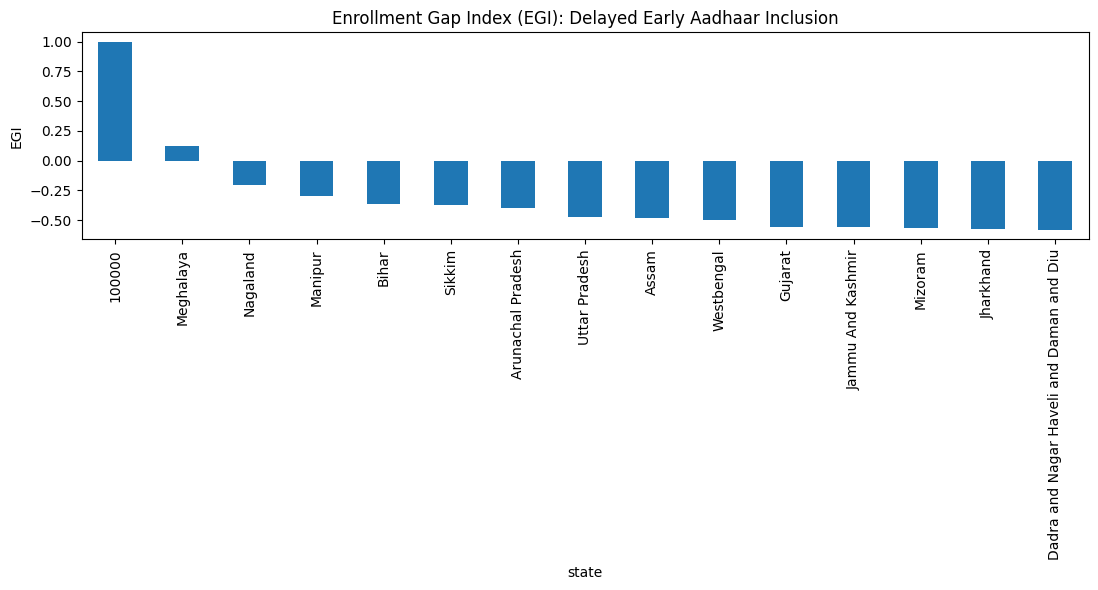

In [50]:

egi_state = final_df.groupby('state')['egi'].mean().sort_values(ascending=False)

plt.figure(figsize=(11,6))
egi_state.head(15).plot(kind='bar')
plt.title("Enrollment Gap Index (EGI): Delayed Early Aadhaar Inclusion")
plt.ylabel("EGI")
plt.tight_layout()
plt.savefig("outputs/charts/EGI.png")
plt.show()


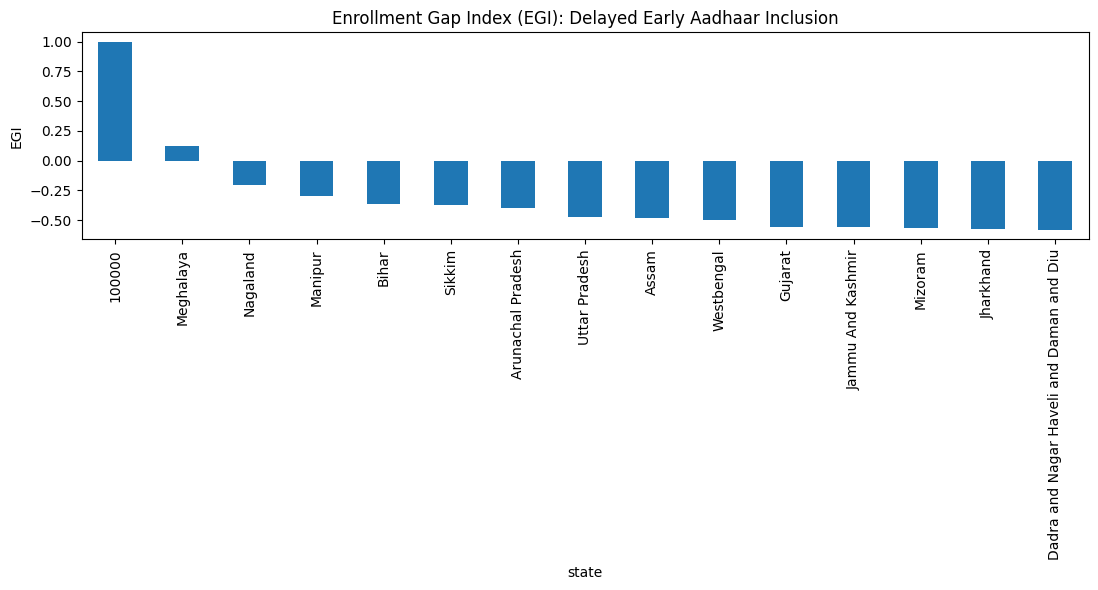

In [51]:
plt.figure(figsize=(11,6))
egi_state.head(15).plot(kind='bar')
plt.title("Enrollment Gap Index (EGI): Delayed Early Aadhaar Inclusion")
plt.ylabel("EGI")
plt.tight_layout()
plt.savefig("outputs/charts/EGI.png")
plt.show()


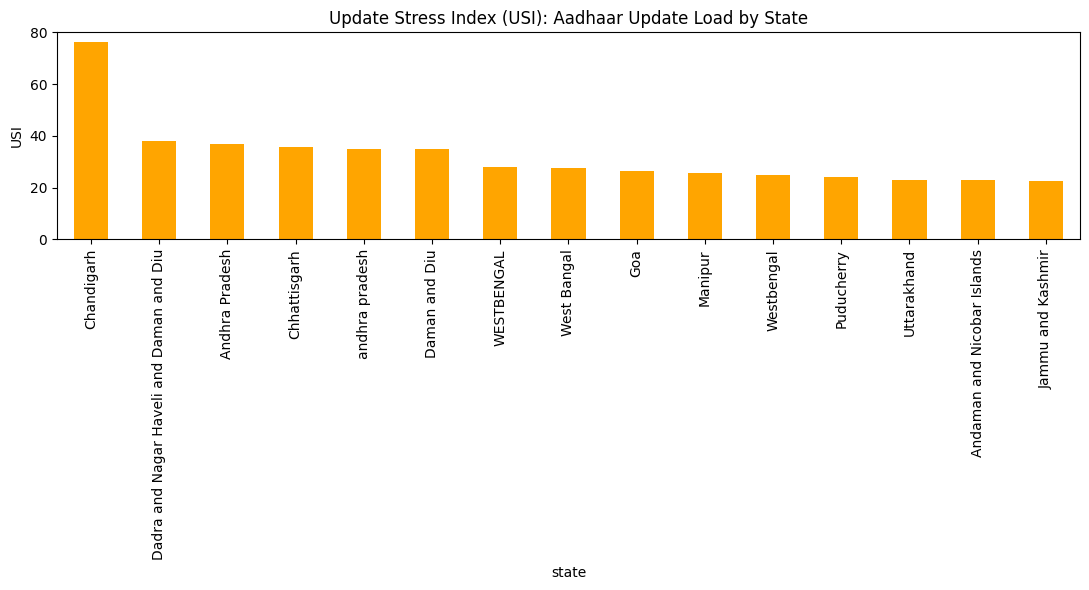

In [52]:
usi_state = final_df.groupby('state')['usi'].mean().sort_values(ascending=False)

plt.figure(figsize=(11,6))
usi_state.head(15).plot(kind='bar', color='orange')
plt.title("Update Stress Index (USI): Aadhaar Update Load by State")
plt.ylabel("USI")
plt.tight_layout()
plt.savefig("outputs/charts/USI.png")
plt.show()


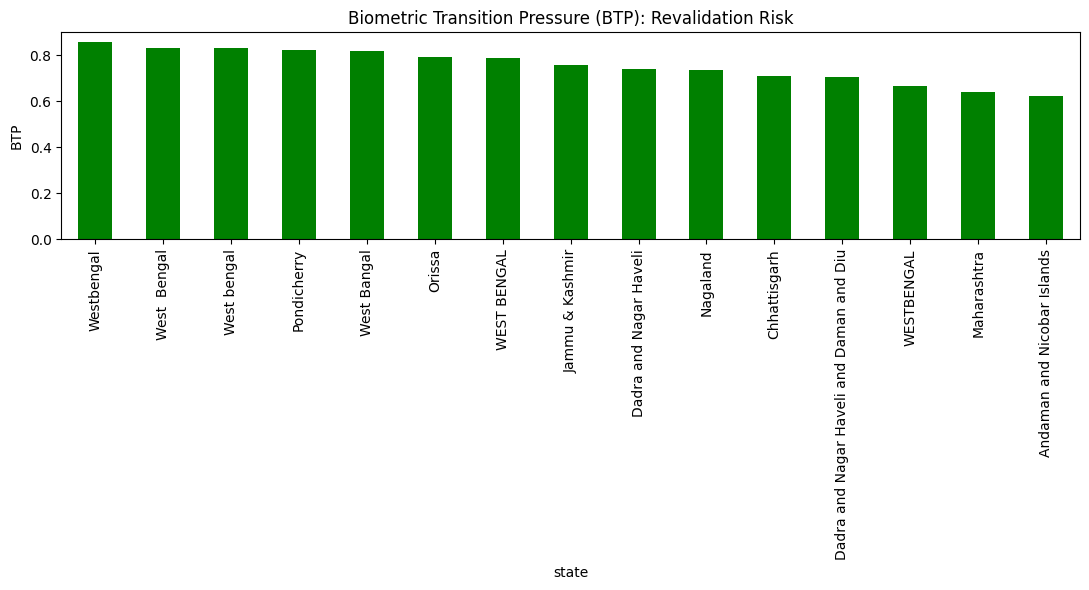

In [53]:
btp_state = final_df.groupby('state')['btp'].mean().sort_values(ascending=False)

plt.figure(figsize=(11,6))
btp_state.head(15).plot(kind='bar', color='green')
plt.title("Biometric Transition Pressure (BTP): Revalidation Risk")
plt.ylabel("BTP")
plt.tight_layout()
plt.savefig("outputs/charts/BTP.png")
plt.show()


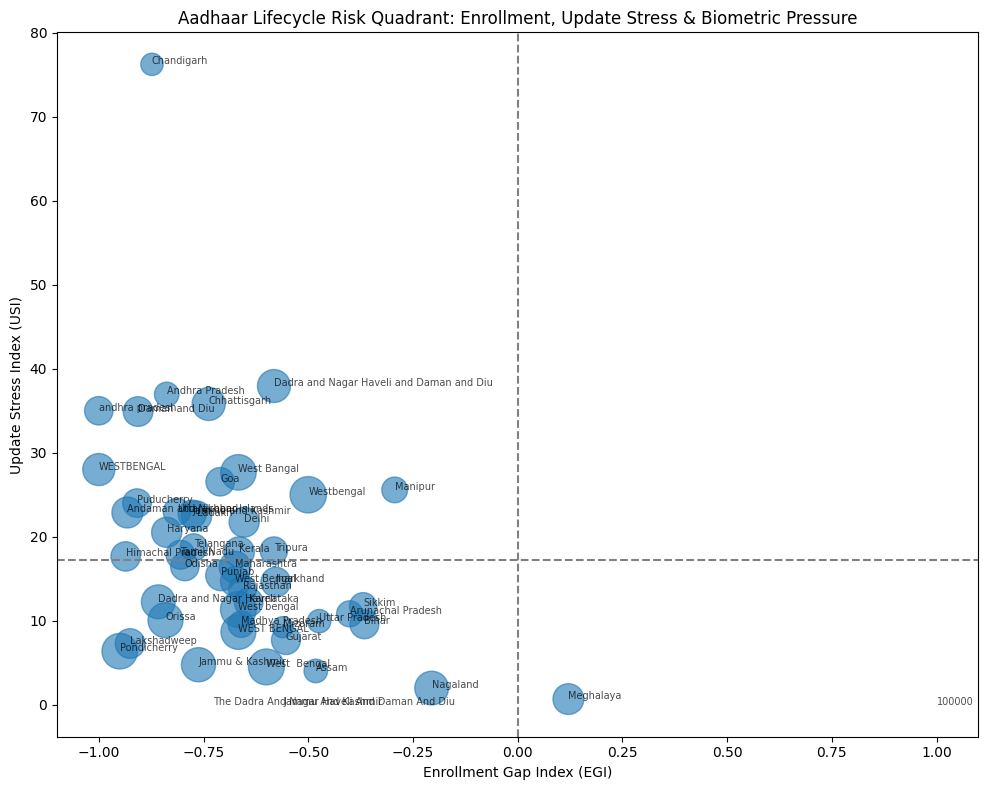

In [ ]:
plt.figure(figsize=(10,8))

plt.scatter(
    final_df['egi'],
    final_df['usi'],
    s=final_df['btp'] * 800,  
    alpha=0.6
)

for i, state in enumerate(final_df['state']):
    plt.text(
        final_df['egi'].iloc[i],
        final_df['usi'].iloc[i],
        state,
        fontsize=7,
        alpha=0.7
    )

plt.axvline(0, linestyle='--', color='grey')
plt.axhline(final_df['usi'].mean(), linestyle='--', color='grey')

plt.xlabel("Enrollment Gap Index (EGI)")
plt.ylabel("Update Stress Index (USI)")
plt.title("Aadhaar Lifecycle Risk Quadrant: Enrollment, Update Stress & Biometric Pressure")

plt.tight_layout()
plt.savefig("outputs/charts/Aadhaar_Risk_Quadrant.png")
plt.show()


In [55]:
final_df['risk_score'] = (
    0.4 * final_df['egi'].abs() +
    0.4 * final_df['usi'] +
    0.2 * final_df['btp']
)


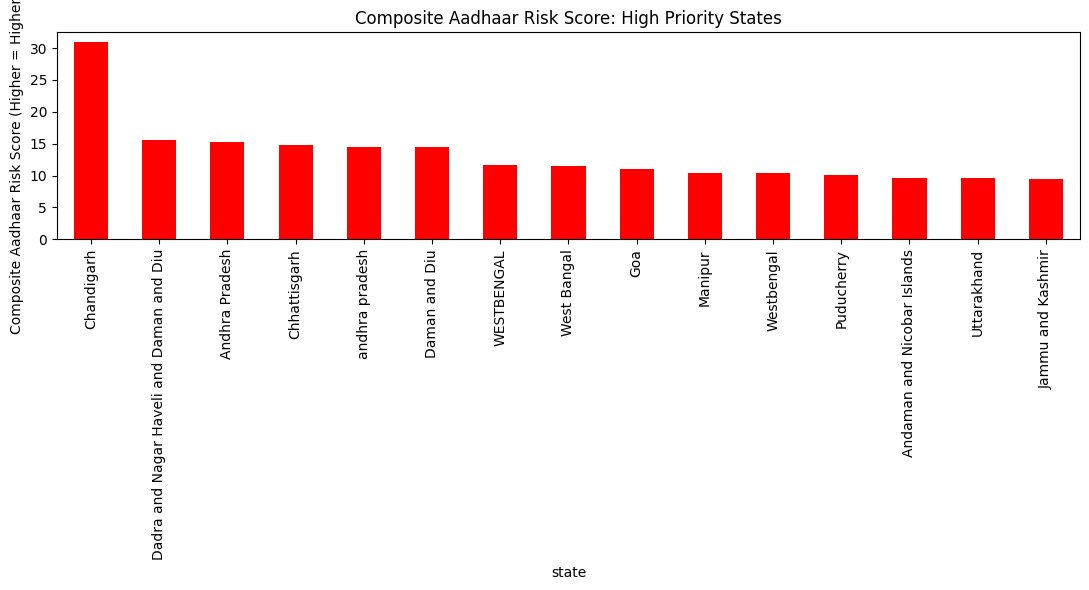

Text(0, 0.5, 'Composite Aadhaar Risk Score (Higher = Higher Priority)')

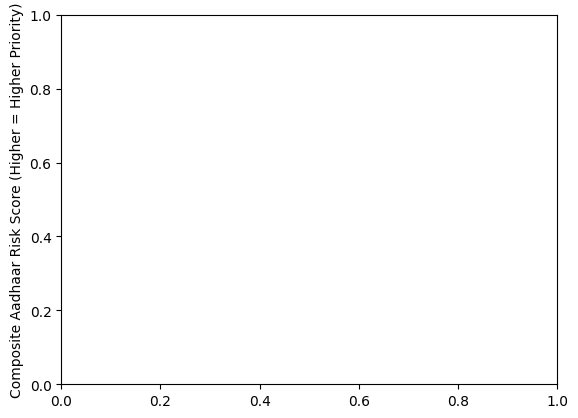

In [56]:
risk_state = final_df.groupby('state')['risk_score'].mean().sort_values(ascending=False)

plt.figure(figsize=(11,6))
risk_state.head(15).plot(kind='bar', color='red')
plt.title("Composite Aadhaar Risk Score: High Priority States")
plt.ylabel("Composite Aadhaar Risk Score (Higher = Higher Priority)")
plt.tight_layout()
plt.savefig("outputs/charts/Aadhaar_Risk_Score.png")
plt.show()
plt.ylabel("Composite Aadhaar Risk Score (Higher = Higher Priority)")



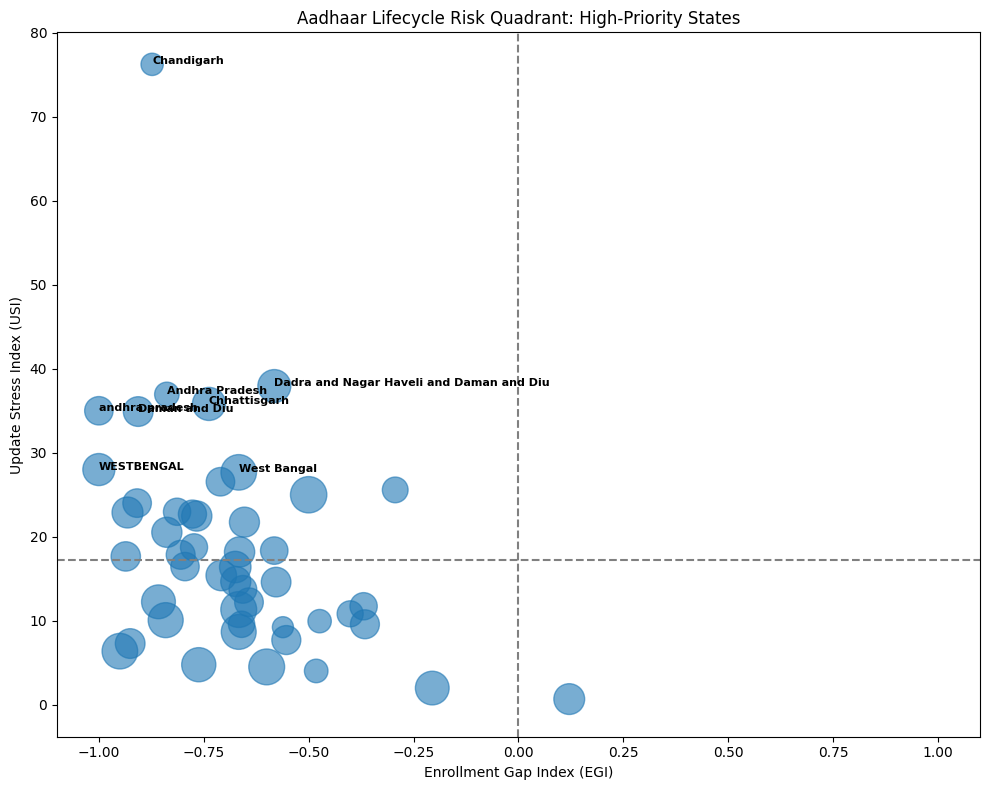

In [57]:
top_states = risk_state.head(8).index.tolist()

plt.figure(figsize=(10,8))
plt.scatter(
    final_df['egi'],
    final_df['usi'],
    s=final_df['btp'] * 800,
    alpha=0.6
)

for i, state in enumerate(final_df['state']):
    if state in top_states:
        plt.text(
            final_df['egi'].iloc[i],
            final_df['usi'].iloc[i],
            state,
            fontsize=8,
            weight='bold'
        )

plt.axvline(0, linestyle='--', color='grey')
plt.axhline(final_df['usi'].mean(), linestyle='--', color='grey')

plt.xlabel("Enrollment Gap Index (EGI)")
plt.ylabel("Update Stress Index (USI)")
plt.title("Aadhaar Lifecycle Risk Quadrant: High-Priority States")

plt.tight_layout()
plt.savefig("outputs/charts/Aadhaar_Risk_Quadrant_Final.png")
plt.show()


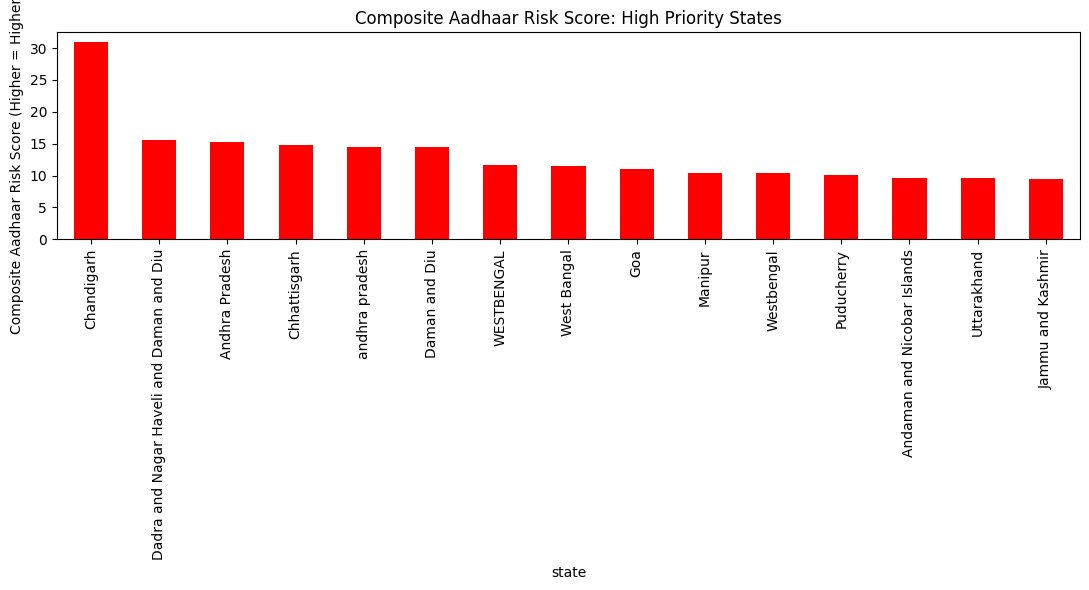

Text(0, 0.5, 'Composite Aadhaar Risk Score (Higher = Higher Priority)')

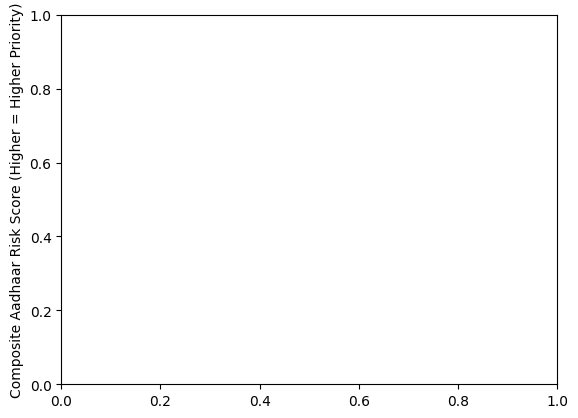

In [58]:
risk_state = final_df.groupby('state')['risk_score'].mean().sort_values(ascending=False)

plt.figure(figsize=(11,6))
risk_state.head(15).plot(kind='bar', color='red')
plt.title("Composite Aadhaar Risk Score: High Priority States")
plt.ylabel("Composite Aadhaar Risk Score (Higher = Higher Priority)")
plt.tight_layout()
plt.savefig("outputs/charts/Aadhaar_Risk_Score.png")
plt.show()
plt.ylabel("Composite Aadhaar Risk Score (Higher = Higher Priority)")



## 5. Machine Learning-Based Risk Analysis
Unsupervised and explainable machine learning techniques are applied for Aadhaar risk segmentation.


In [59]:
!pip install scikit-learn


In [60]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

features = final_df[['egi', 'usi', 'btp', 'risk_score']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)


In [61]:
kmeans = KMeans(n_clusters=3, random_state=42)
final_df['risk_cluster'] = kmeans.fit_predict(X_scaled)


In [ ]:
cluster_summary = final_df.groupby('risk_cluster')['risk_score'].mean()
cluster_summary


In [63]:
cluster_map = {
    1: 'Low Risk',
    0: 'Medium Risk',
    2: 'High Risk'
}

final_df['risk_cluster_label'] = final_df['risk_cluster'].map(cluster_map)


In [ ]:
final_df[['state', 'risk_score', 'risk_cluster_label']].sort_values(
    'risk_score', ascending=False
).head(10)


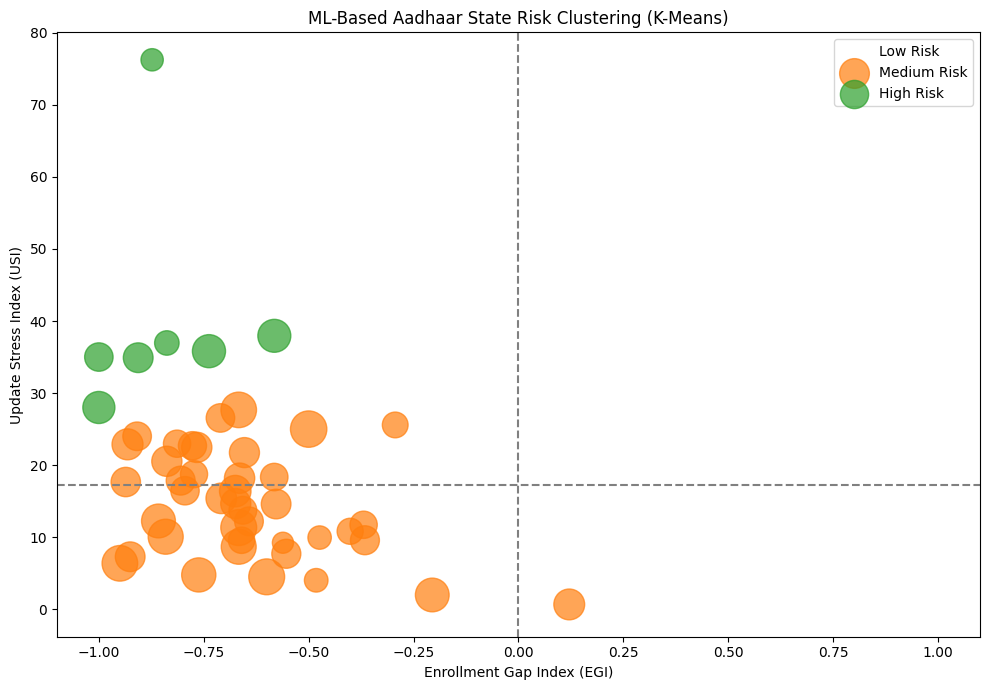

In [65]:
plt.figure(figsize=(10,7))

for label in ['Low Risk', 'Medium Risk', 'High Risk']:
    subset = final_df[final_df['risk_cluster_label'] == label]
    plt.scatter(
        subset['egi'],
        subset['usi'],
        s=subset['btp'] * 800,
        alpha=0.7,
        label=label
    )

plt.axvline(0, linestyle='--', color='grey')
plt.axhline(final_df['usi'].mean(), linestyle='--', color='grey')

plt.xlabel("Enrollment Gap Index (EGI)")
plt.ylabel("Update Stress Index (USI)")
plt.title("ML-Based Aadhaar State Risk Clustering (K-Means)")

plt.legend()
plt.tight_layout()
plt.savefig("outputs/charts/ML_Risk_Clusters_Final.png")
plt.show()


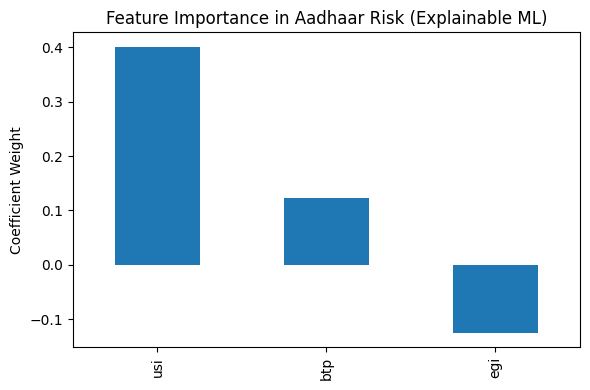

In [66]:
from sklearn.linear_model import LinearRegression

X = final_df[['egi', 'usi', 'btp']]
y = final_df['risk_score']

model = LinearRegression()
model.fit(X, y)

importance = pd.Series(model.coef_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(6,4))
importance.plot(kind='bar')
plt.title("Feature Importance in Aadhaar Risk (Explainable ML)")
plt.ylabel("Coefficient Weight")
plt.tight_layout()
plt.savefig("outputs/charts/Feature_Importance.png")
plt.show()


In [67]:
final_df['state'] = final_df['state'].str.title().str.strip()

state_fix = {
    'Westbengal': 'West Bengal',
    'Andhra Pradesh ': 'Andhra Pradesh'
}

final_df['state'] = final_df['state'].replace(state_fix)


In [68]:
final_df = final_df.groupby(
    ['state', 'year'], as_index=False
).mean(numeric_only=True)


In [69]:
cluster_map = {
    1: 'Low Risk',
    0: 'Medium Risk',
    2: 'High Risk'
}

final_df['risk_cluster_label'] = final_df['risk_cluster'].map(cluster_map)


In [ ]:
risk_table = (
    final_df[['state', 'risk_score', 'risk_cluster_label']]
    .sort_values('risk_score', ascending=False)
    .drop_duplicates('state')
)

risk_table.head(10)


In [71]:
final_df['risk_cluster_label'] = final_df['risk_cluster_label'].fillna('Medium Risk')


In [72]:
final_df.isnull().sum()


state                 0
year                  0
age_0_5               0
age_5_17              0
age_18_greater        0
demo_age_5_17         0
demo_age_17_          0
bio_age_5_17          0
bio_age_17_           0
egi                   0
usi                   0
btp                   0
risk_score            0
risk_cluster          0
risk_cluster_label    0
dtype: int64

## Reproducibility Note
This notebook is fully reproducible and can be executed end-to-end using the UIDAI hackathon datasets. All paths are relative and no external data is required.
